<h1 align="center">Volume 2: The Fourier Transform.</h1>

    <Name> Dallin Seyfried  
    <Class> 321 002
    <Date> 11/29

<h2 align="center">Part 1: The Discrete Fourier Transform</h2>

In [118]:
from matplotlib import pyplot as plt
from scipy.io import wavfile
import numpy as np
import IPython
from scipy.fftpack import fft

In [119]:
plt.rcParams["figure.dpi"] = 300             # Fix plot quality.
plt.rcParams["figure.figsize"] = (12,3)      # Change plot size / aspect (you may adjust this).

In [120]:
class SoundWave(object):
    """A class for working with digital audio signals."""

    # Problem 1.1
    def __init__(self, rate, samples):
        """Set the SoundWave class attributes.

        Parameters:
            rate (int): The sample rate of the sound.
            samples ((n,) ndarray): NumPy array of samples.
        """
        self.rate = rate
        self.samples = samples

    # Problems 1.1 and 1.7
    def plot(self, show_dft=False):
        """Plot the graph of the sound wave (time versus amplitude)."""

        # Do the Frequencies plot
        if show_dft:
            time = self.samples.size / self.rate
            domain = np.linspace(0, time, self.samples.size)

            domain = np.arange(0, self.samples.size) * self.rate / self.samples.size
            mag = np.abs(fft(self.samples))

            plt.subplot(121)
            plt.plot(domain[:len(domain)//2], mag[:len(domain)//2]/time)
            plt.ylim(ymin=0)
            plt.xlim(xmin=0)
            plt.xlabel("Frequencies")
            plt.ylabel("Magnitudes")
            plt.title("Plot of the Sound Wave")
        
        # Plot the sound wave
        x = np.linspace(0, len(self.samples) / self.rate, len(self.samples))
        plt.subplot(122)
        plt.plot(x, self.samples)
        plt.ylim(-32768, 32767)
        plt.xlabel("Seconds")
        plt.ylabel("Amplitude")
        plt.title("Plot of the Sound Wave")
        plt.tight_layout()
        plt.show()


    # Problem 1.2
    def export(self, filename, force=False):
        """Generate a wav file from the sample rate and samples. 
        If the array of samples is not of type np.int16, scale it before exporting.

        Parameters:
            filename (str): The name of the wav file to export the sound to.
        """
        export_samples = self.samples

        # Set the export samples to be the scaled version if conditions are true
        if type(self.samples) is not np.int16 or force is True:
            export_samples = np.int16((self.samples / np.max(np.abs(self.samples))) * 32767)

        # Write the export samples to the filename
        wavfile.write(filename, self.rate, export_samples)
    
    # Problem 1.4
    def __add__(self, other):
        """Combine the samples from two SoundWave objects.

        Parameters:
            other (SoundWave): An object containing the samples to add
                to the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the combined samples.

        Raises:
            ValueError: if the two sample arrays are not the same length.
        """
        # Raise Value Error if lengths don't match
        if len(self.samples) != len(other.samples):
            raise ValueError("Lengths of the sample arrays to add are not the same")
        
        # Create new samples and a sound wave object
        samples = self.samples + other.samples
        sound_wave = SoundWave(self.rate, samples)
        return sound_wave

    # Problem 1.4
    def __rshift__(self, other):
        """Concatentate the samples from two SoundWave objects.

        Parameters:
            other (SoundWave): An object containing the samples to concatenate
                to the samples contained in this object.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        # Check sample rates
        if self.rate != other.rate:
            raise ValueError("Sample rates are not equal")
        
        # Create new samples and a sound wave object
        samples = np.append(self.samples, other.samples)
        sound_wave = SoundWave(self.rate, samples)
        return sound_wave
    
    # Problem 2.1
    def __mul__(self, other):
        """Convolve the samples from two SoundWave objects using circular convolution.
        
        Parameters:
            other (SoundWave): An object containing the samples to convolve
                with the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the convolved samples.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        raise NotImplementedError("Problem 2.1 Incomplete")

    # Problem 2.2
    def __pow__(self, other):
        """Convolve the samples from two SoundWave objects using linear convolution.
        
        Parameters:
            other (SoundWave): An object containing the samples to convolve
                with the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the convolved samples.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        raise NotImplementedError("Problem 2.2 Incomplete")

    # Problem 2.4
    def clean(self, low_freq, high_freq):
        """Remove a range of frequencies from the samples using the DFT. 

        Parameters:
            low_freq (float): Lower bound of the frequency range to zero out.
            high_freq (float): Higher boound of the frequency range to zero out.
        """
        raise NotImplementedError("Problem 2.4 Incomplete")

### Problem 1.1

- Implement `SoundWave.__init__()`.
- Implement `SoundWave.plot()`.
- Use the `scipy.io.wavfile.read()` and the `SoundWave` class to plot `tada.wav`.

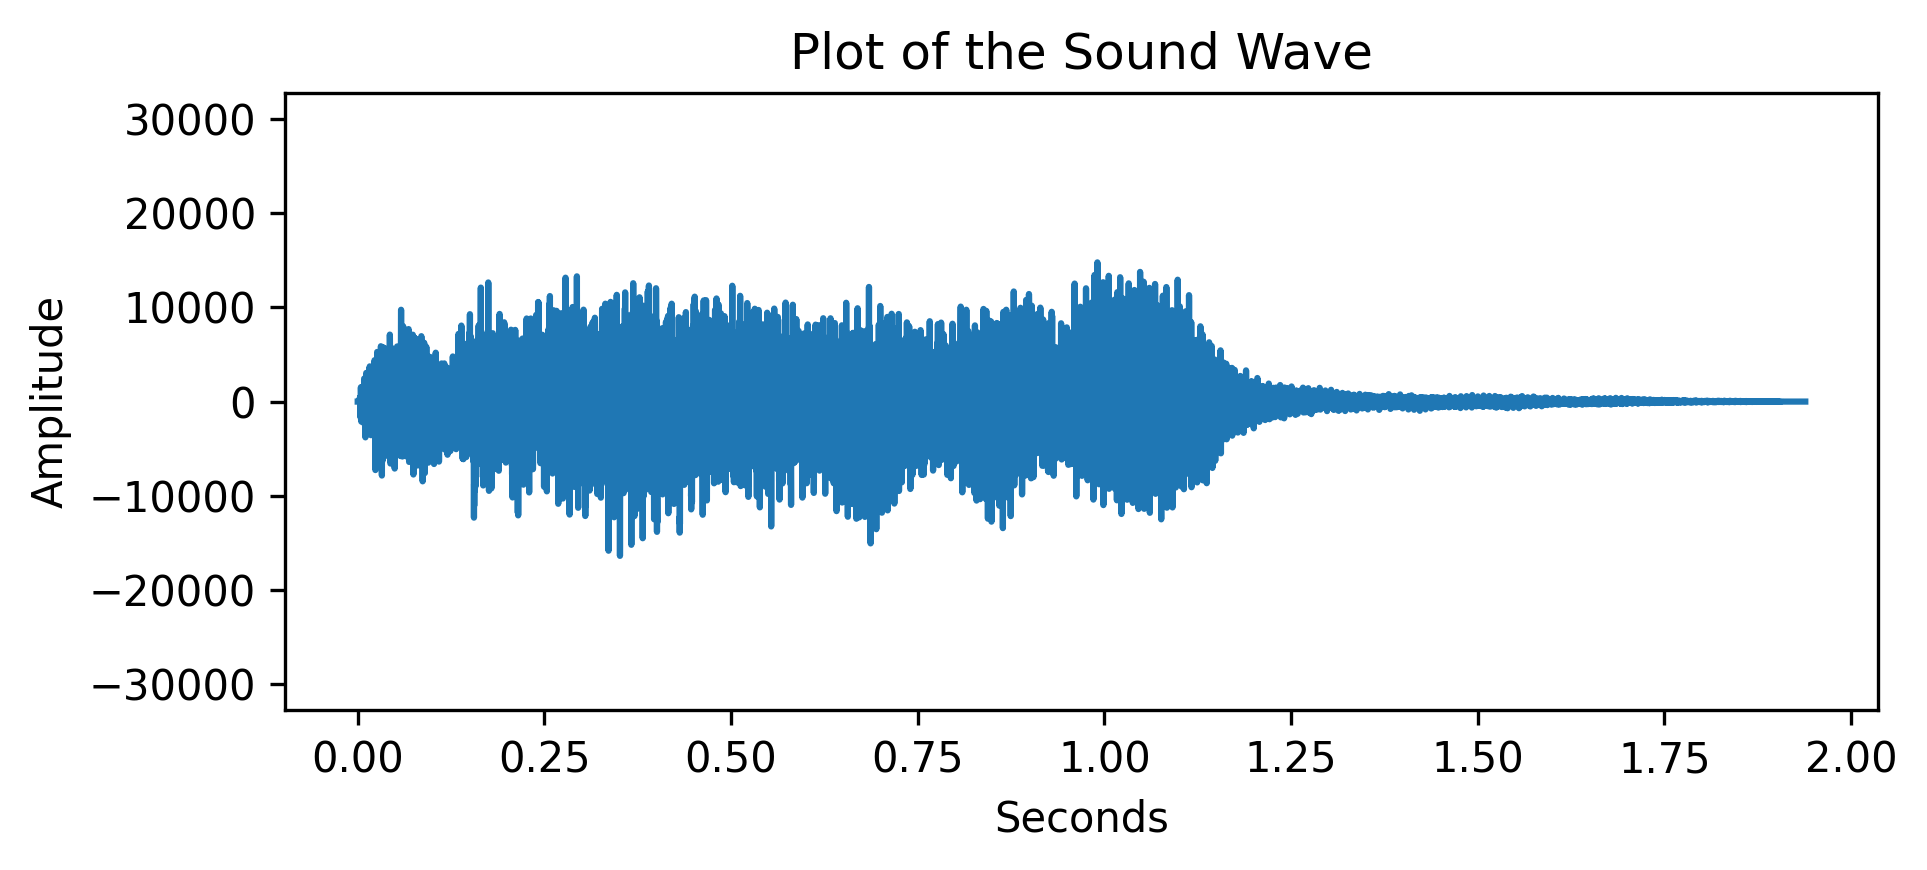

In [121]:
rate, samples = wavfile.read("tada.wav")
sound_wave = SoundWave(rate, samples)
sound_wave.plot()

### Problem 1.2

- Implement `SoundWave.export()`.
- Use the `export()` method to create two new files containing the same sound as `tada.wav`: one without scaling, and one with scaling (use `force=True`).
- Use `IPython.display.Audio()` to embed the original and new versions of `tada.wav` in the notebook.

In [122]:
rate, samples = wavfile.read("tada.wav")
sound_wave = SoundWave(rate, samples)
# Export the unscaled version
sound_wave.export("export.wav")
# Export the scaled version
sound_wave.export("export_scaled.wav", True)

print("Original tada.wav")
IPython.display.Audio(filename="tada.wav")

Original tada.wav


In [123]:
print("Exported tada.wav")
IPython.display.Audio(filename="export.wav")

Exported tada.wav


In [124]:
print("Exported scaled tada.wav")
IPython.display.Audio(filename="export_scaled.wav")

Exported scaled tada.wav


### Problem 1.3

- Implement `generate_note()`.
- Use `generate_note()` to create an A tone that lasts for two seconds. Embed it in the notebook.

In [125]:
def generate_note(frequency, duration):
    """Generate an instance of the SoundWave class corresponding to 
    the desired soundwave. Uses sample rate of 44100 Hz.
    
    Parameters:
        frequency (float): The frequency of the desired sound.
        duration (float): The length of the desired sound in seconds.
    
    Returns:
        sound (SoundWave): An instance of the SoundWave class.
    """
    # Define the sinusoid function
    def f(x):
        return np.sin(2 * np.pi * x * frequency)
    
    # Generate the appropriate linspace and samples
    rate = 44100
    x = np.linspace(0, duration, rate * duration)
    samples = f(x)

    # Create a sound wave class and return it
    return SoundWave(rate, samples)

In [126]:
# Generate A
sound_wave = generate_note(440, 2)
IPython.display.Audio(rate=sound_wave.rate, data=sound_wave.samples)

### Problem 1.4

- Implement `SoundWave.__add__()`.
- Generate a three-second A minor chord (A, C, and E) and embed it in the notebook.
- Implement `SoundWave.__rshift__()`.
- Generate the arpeggio A$\,\rightarrow\,$C$\,\rightarrow\,$E, where each tone lasts one second, and embed it in the notebook.

In [127]:
# Generate A minor
a_sound = generate_note(440, 3)
c_sound = generate_note(523.25, 3)
e_sound = generate_note(659.25, 3)

a_minor_sound = a_sound + c_sound + e_sound
IPython.display.Audio(rate=a_minor_sound.rate, data=a_minor_sound.samples)

In [128]:
# Generate Arpeggio
a_sound = generate_note(440, 1)
c_sound = generate_note(523.25, 1)
e_sound = generate_note(659.25, 1)

arpeggio = a_sound >> c_sound >> e_sound
IPython.display.Audio(rate=arpeggio.rate, data=arpeggio.samples)

### Problem 1.5

- Implement `simple_dft()` with the formula $c=F_nf$, where $F_n$ is the n-dimensional DFT matrix.
- Use `np.allclose()` to check that `simple_dft()` and `scipy.fftpack.fft()` give the same result (after scaling).

In [129]:
def simple_dft(samples):
    """Compute the DFT of an array of samples.

    Parameters:
        samples ((n,) ndarray): an array of samples.
    
    Returns:
        ((n,) ndarray): The DFT of the given array.
    """
    n = len(samples)
    m = np.arange(n).reshape(n, 1)
    # Create W from m, n and the formula
    W = np.exp((-2j * np.pi / n) * m @ m.T)
    return W @ samples / n

In [130]:
# Check simple_dft against fft
n = 20
arr = np.random.randint(-100, 100, n)
print(np.allclose(simple_dft(arr), fft(arr) / n))

True


### Problem 1.6

- Implement `simple_fft()`.
- Generate an array of $8192$ random samples and take its DFT using `simple_dft()`, `simple_fft()`, and `scipy.fftpack.fft()`.
Print the runtimes of each computation.
- Use `np.allclose()` to check that `simple_fft()` and `scipy.fftpack.fft()` give the same result (after scaling).

In [131]:
def simple_fft(samples, threshold=1):
    """Compute the DFT using the FFT algorithm.
    
    Parameters:
        samples ((n,) ndarray): an array of samples.
        threshold (int): when a subarray of samples has fewer
            elements than this integer, use simple_dft() to
            compute the DFT of that subarray.
    
    Returns:
        ((n,) ndarray): The DFT of the given array.
    """
    def split(g):
        n = g.size
        if n <= threshold:
            # Use Problem 5 function if small enough
            return simple_dft(g)
        else:
            # Get DFT of the even and odd sets
            even = split(g[::2])
            odd = split(g[1::2])

            # Calculate the exponential parts of the sum
            k = np.arange(n)
            z = np.exp(-2j * np.pi * k / n)

            # Get the middle index for z
            m = n // 2
            
            # Concatenate two arrays of length m
            return np.append(even + np.multiply(z[:m], odd), even + np.multiply(z[m:], odd))

    return split(samples) / len(samples)

In [132]:
# Check simple_fft method against scipy fft
n = 8192
arr = np.random.random(n)
test = simple_fft(arr)
test1 = fft(arr) / n
print(np.allclose(simple_fft(arr), fft(arr) / n))

True


### Problem 1.7

- Modify `SoundWave.plot()` so that it accepts a boolean. When the boolean is `True`, take the DFT of the stored samples and plot (in a new subplot) the frequencies present on the $x$-axis and the magnituds of those frequences on the $y$-axis. Only the display the first half of the plot, and adjust the $x$-axis so that it correctly shows the frequencies in Hertz.
- Display the plot of the DFT of an A tone.
- Display the plot of the DFT of an A minor chord.

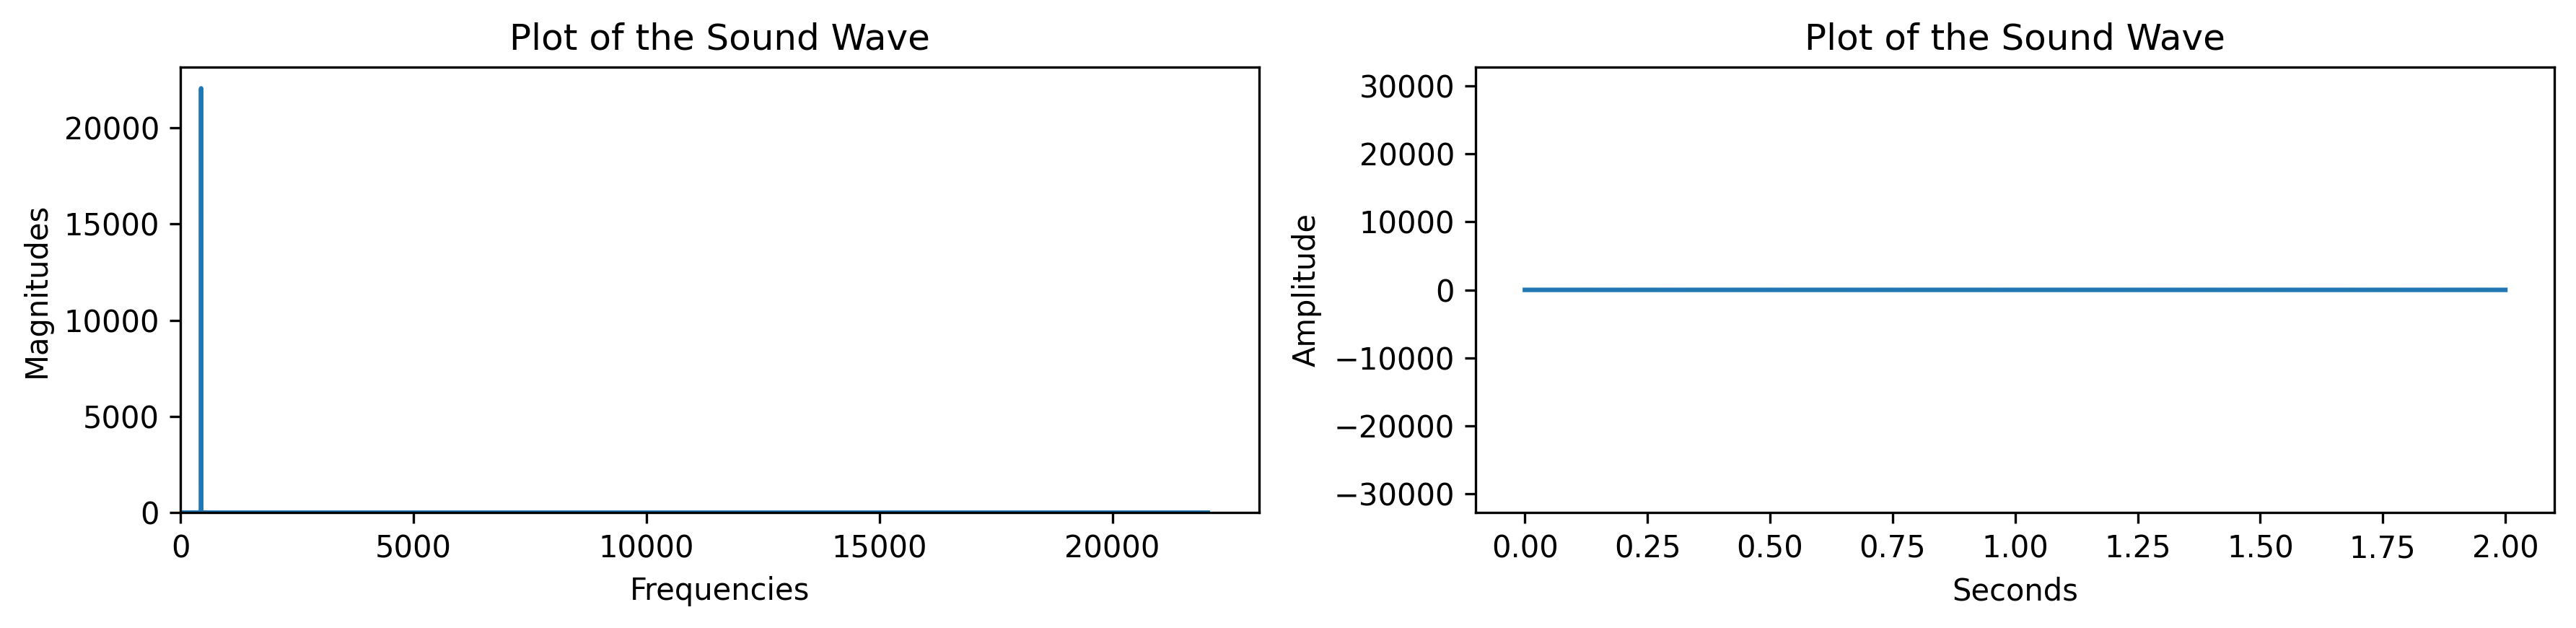

In [133]:
# Plot the DFT for A
sound_wave = generate_note(440, 2)
sound_wave.plot(show_dft=True)

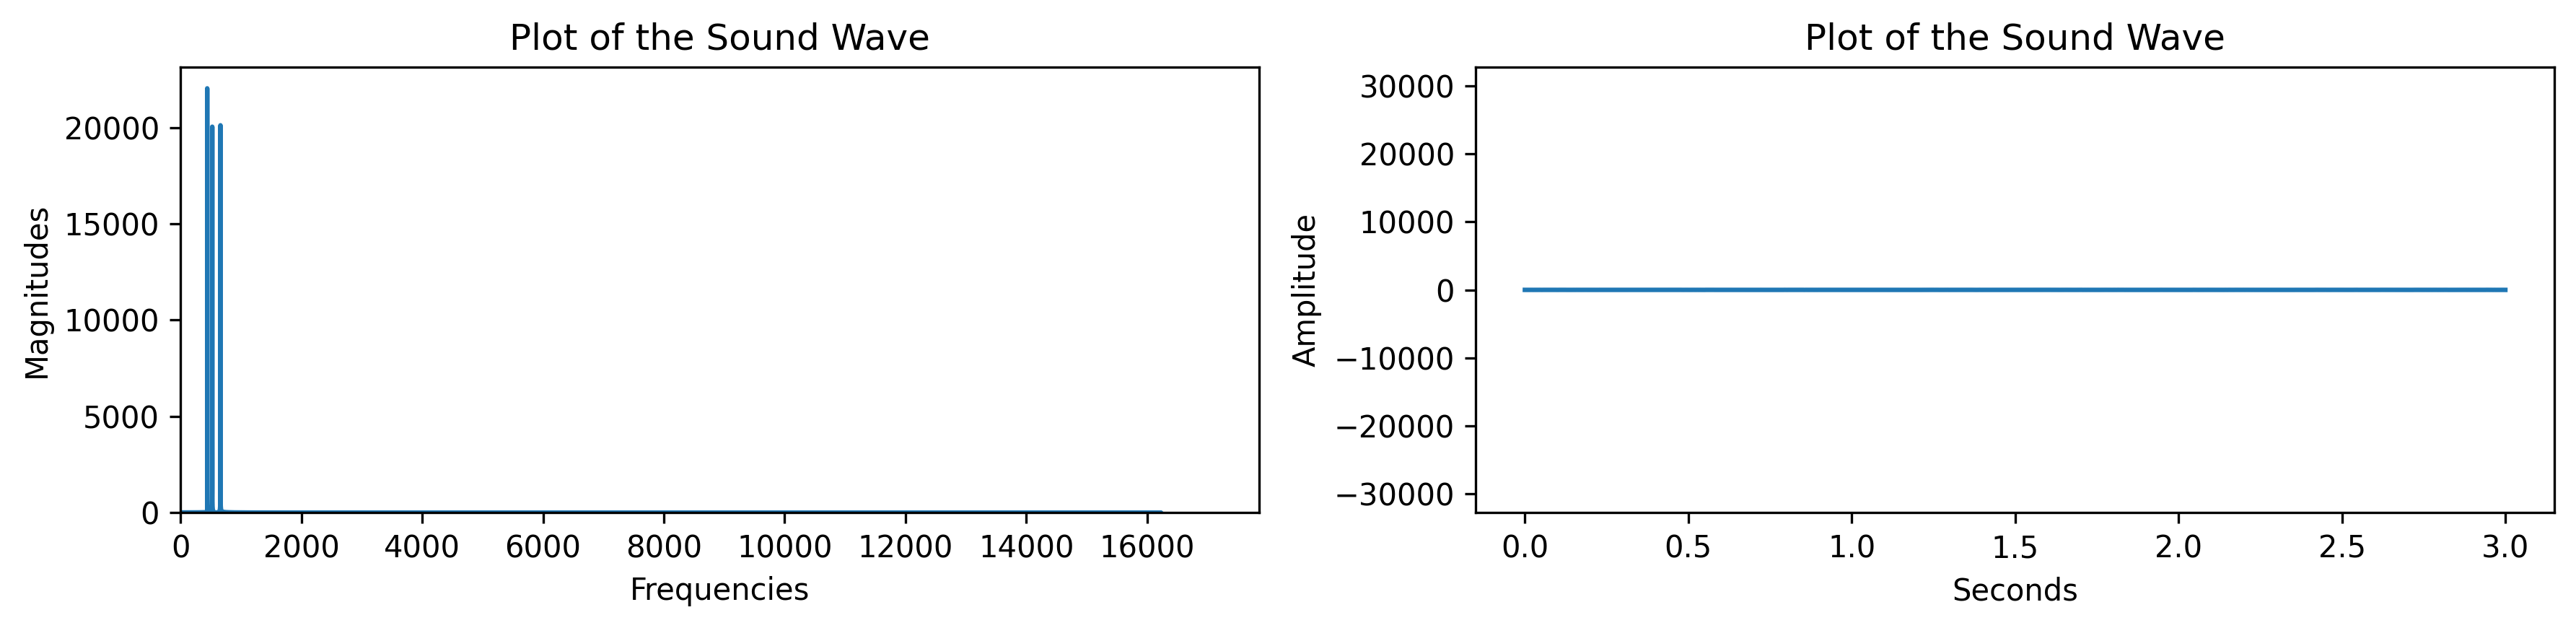

In [134]:
# Plot the dft for the A minor
a_sound = generate_note(440, 3)
c_sound = generate_note(523.25, 3)
e_sound = generate_note(659.25, 3)

a_minor_sound = a_sound + c_sound + e_sound
a_minor_sound.plot(show_dft=True)

### Problem 1.8

Use the DFT to determine the individual notes that are present in `mystery_chord.wav`.

In [135]:
# Read the file and store the samples
rate, samples = wavfile.read("mystery_chord.wav")
sound_wave = SoundWave(rate, samples)

In [136]:
# Calculate the top frequencies
coefficients = np.abs(fft(samples))
top_freq = np.argsort(coefficients[:len(coefficients)//2])[::-1][:4]
frequencies = top_freq * rate / len(samples)
print(frequencies)

[440.   784.   523.25 587.5 ]


The notes are A, G, C, D

<h2 align="center">Part 2: Convolution and Filtering.</h2>

### Problem 2.1

- Implement `SoundWave.__mul__()` for circular convolution.
- Generate 2 seconds of white noise at the same sample rate as `tada.wav`.
- Compute the circular convolution of `tada.wav` and the white noise. Embed the result in the notebook.
- Append the circular convolution to itself and embed the result in the notebook.

### Problem 2.2

- Implement `SoundWave.__pow__()` for linear convolution.
- Time the linear convolution of `CGC.wav` and `GCG.wav` using `SoundWave.__pow__()` and `scipy.signal.fftconvolve()`.
- Embed the two original sounds and their convolutions in the notebook. Check that the convolutions with `SoundWave.__pow__()` and `scipy.signal.fftconvolve()` sound the same.

### Problem 2.3

Use `SoundWave.__pow__()` or `scipy.signal.fftconvolve()` to compute the linear convolution of `chopin.wav` and `balloon.wav`.
Embed the two original sounds and their convolution in the notebook.

### Problem 2.4

- Implement `SoundWave.clean()`.
- Clean `noisy1.wav` by filtering out frequencies from $1250$-$2600$ Hz. Embed the original and the cleaned versions in the notebook.
- Clean `noisy2.wav`. Embed the original and the cleaned versions in the notebook.

### Problem 2.5

- Clean `vuvuzela.wav` by filtering bad frequencies out of the left and right channels individually.
- Recombine the left and right channels and embed the result in the notebook.

### Problem 2.6

- Clean up `license_plate.png` so that the year printed on the sticker in the bottom right corner of the plate is legible.
- Display the original and cleaned images.

The year on the sticker is...